In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [2]:
df = pd.read_csv("./../data/train_derived.csv")

In [3]:
df.head()

Unnamed: 0  step      type    amount   from_nodes  oldbalanceOrg  \
0           0     1   PAYMENT   9839.64  C1231006815       170136.0   
1           1     1   PAYMENT   1864.28  C1666544295        21249.0   
2           2     1  TRANSFER    181.00  C1305486145          181.0   
3           3     1  CASH_OUT    181.00   C840083671          181.0   
4           4     1   PAYMENT  11668.14  C2048537720        41554.0   

   newbalanceOrig     to_nodes  oldbalanceDest  newbalanceDest  \
0       160296.36  M1979787155             0.0             0.0   
1        19384.72  M2044282225             0.0             0.0   
2            0.00   C553264065             0.0             0.0   
3            0.00    C38997010         21182.0             0.0   
4        29885.86  M1230701703             0.0             0.0   

           ...           type_key  type_fraud_weight  orig_balance_change  \
0          ...                  1           0.000000            -0.057834   
1          ...                  1           0.000000            -0.087735   
2          ...                  5           0.007688            -1.000000   
3          ...                  4           0.001840            -1.000000   
4          ...                  1           0.000000            -0.280795   

   dest_balance_change  full_balance_indicator  to_node_weights  edge_weights  \
0                  0.0                       0                1             1   
1                  0.0                       0                1             1   
2                  0.0                       1               44             1   
3                 -1.0                       1               41             1   
4                  0.0                       0                1             1   

   from_node_size_ratio  from_node_fraud_weight  to_node_fraud_weight  
0                   1.0                     0.0              0.000000  
1                   1.0                     0.0              0.000000  
2                   1.0                     1.0              0.022727  
3                   1.0                     1.0              0.024390  
4                   1.0                     0.0              0.000000  

[5 rows x 22 columns]

In [4]:
data_cols = ["type_key",
             "orig_balance_change",
             "full_balance_indicator",
             "from_node_fraud_weight",
             "to_node_weights",
             "to_node_fraud_weight"
            ]

data = df[data_cols]

target = df["isFraud"]

benchmark = df["isFlaggedFraud"]

### Naive Bayes

In [5]:
gnb = GaussianNB()

gnb.fit(data, target)

GaussianNB(priors=None)

In [6]:
gnb.score(data, target)

0.99999638513694045

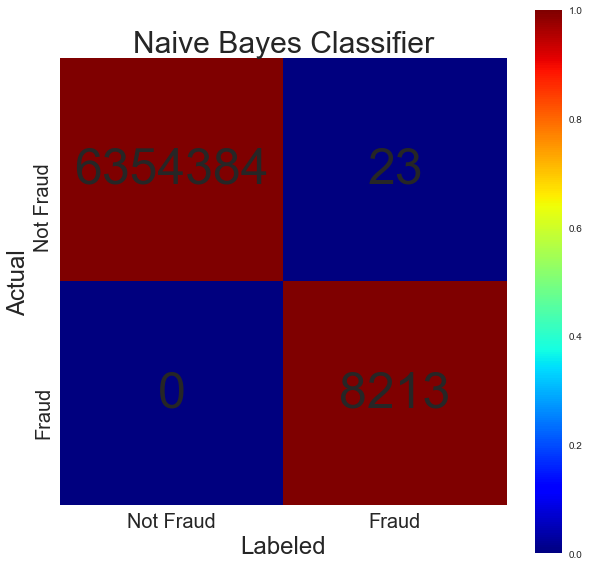

In [9]:
conf_arr = np.array(confusion_matrix(target, gnb.predict(data)))

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize = 50
                   )

cb = fig.colorbar(res)
plt.title("Naive Bayes Classifier", fontsize = 30)
plt.xlabel("Labeled", fontsize = 24)
plt.ylabel("Actual", fontsize = 24)
plt.xticks([0,1], ("Not Fraud", "Fraud"), fontsize = 20)
plt.yticks([0,1], ("Not Fraud", "Fraud"), rotation = "vertical", fontsize = 20)
ax.grid(False)
plt.savefig("./../figures/gnb_conf_matrix.png", dpi=600)

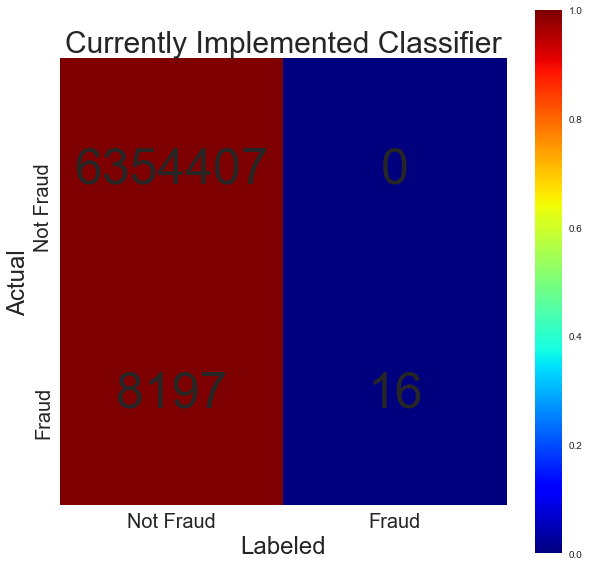

In [10]:
conf_arr = confusion_matrix(target, benchmark)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize = 50
                   )

cb = fig.colorbar(res)
plt.title("Currently Implemented Classifier", fontsize = 30)
plt.xlabel("Labeled", fontsize = 24)
plt.ylabel("Actual", fontsize = 24)
plt.xticks([0,1], ("Not Fraud", "Fraud"), fontsize = 20)
plt.yticks([0,1], ("Not Fraud", "Fraud"), rotation = "vertical", fontsize = 20)
ax.grid(False)
plt.savefig("./../figures/bench_conf_matrix.png", dpi=600)

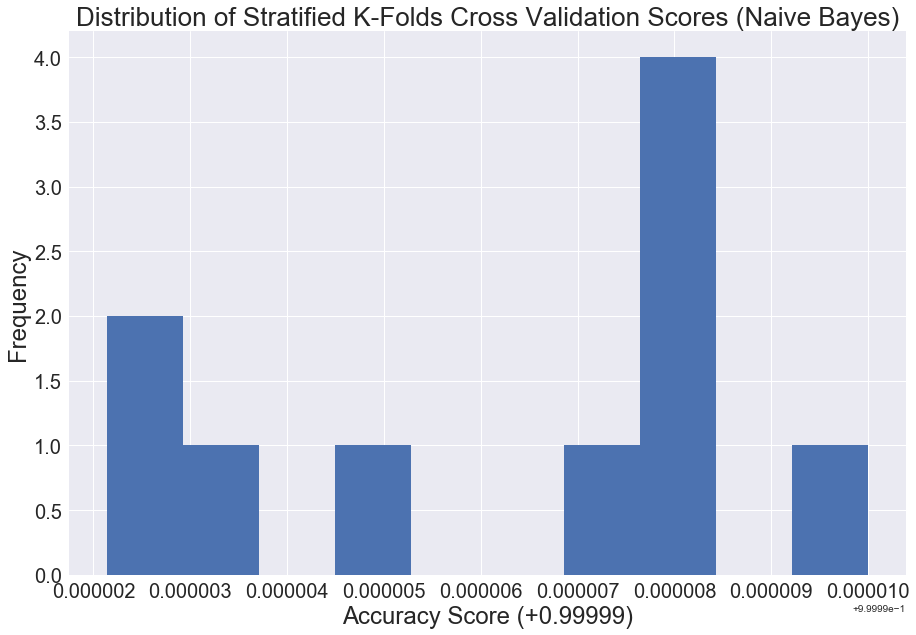

In [11]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

gnb = GaussianNB()
scores = []

for train_idx, test_idx in skf.split(data, target):
    gnb.fit(data.iloc[train_idx], target.iloc[train_idx])
    scores.append(gnb.score(data.iloc[test_idx], target.iloc[test_idx]))
    
plt.figure(figsize=(15,10))
plt.hist(scores)
plt.title("Distribution of Stratified K-Folds Cross Validation Scores (Naive Bayes)", fontsize = 26)
plt.xlabel("Accuracy Score (+0.99999)", fontsize = 24)
plt.xticks(fontsize = 20)
plt.ylabel("Frequency", fontsize = 24)
plt.yticks(fontsize = 20)
plt.savefig("./../figures/gnb_x_val.png", dpi = 600)

### Logistic Regression

In [12]:
log_reg = LogisticRegression()

log_reg.fit(data, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
log_reg.score(data, target)

0.99999685664081772

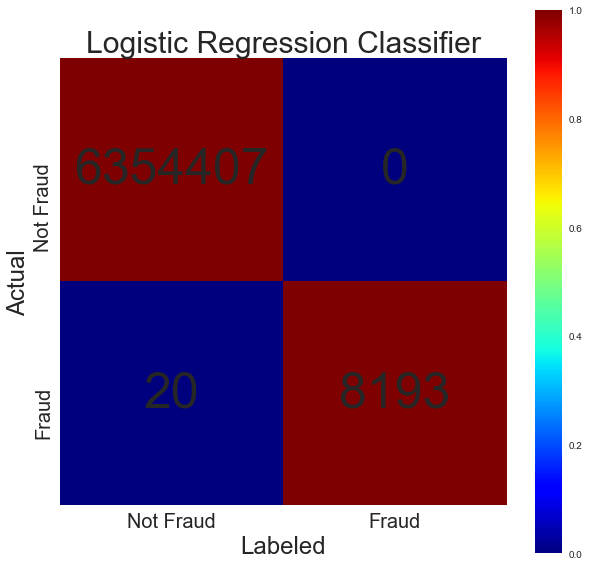

In [14]:
conf_arr = confusion_matrix(target, log_reg.predict(data))

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize = 50
                   )

cb = fig.colorbar(res)
plt.title("Logistic Regression Classifier", fontsize = 30)
plt.xlabel("Labeled", fontsize = 24)
plt.ylabel("Actual", fontsize = 24)
plt.xticks([0,1], ("Not Fraud", "Fraud"), fontsize = 20)
plt.yticks([0,1], ("Not Fraud", "Fraud"), rotation = "vertical", fontsize = 20)
ax.grid(False)
plt.savefig("./../figures/lr_conf_matrix.png", dpi=600)

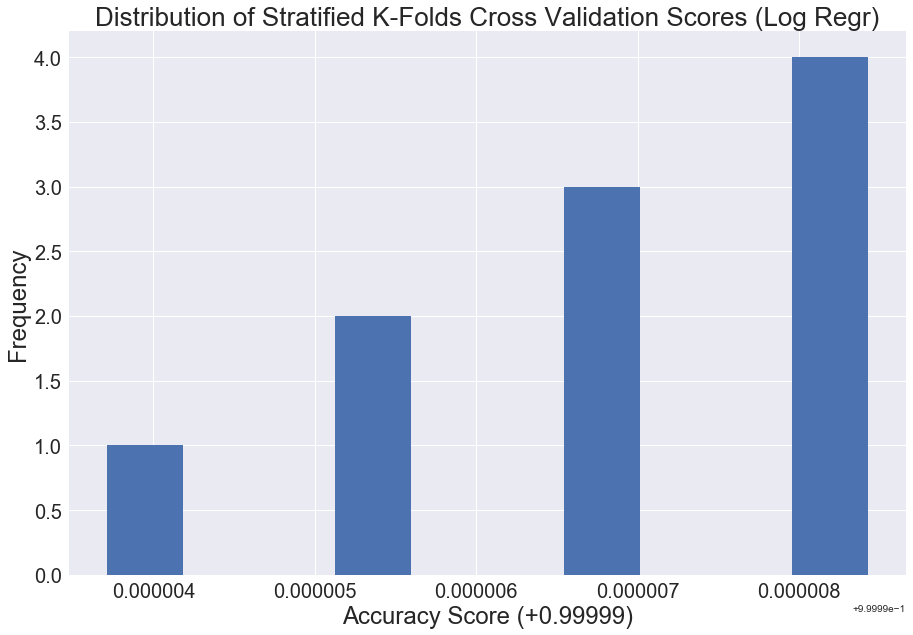

In [15]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

lr = LogisticRegression()
scores = []

for train_idx, test_idx in skf.split(data, target):
    lr.fit(data.iloc[train_idx], target.iloc[train_idx])
    scores.append(lr.score(data.iloc[test_idx], target.iloc[test_idx]))
    
plt.figure(figsize=(15,10))
plt.hist(scores)
plt.title("Distribution of Stratified K-Folds Cross Validation Scores (Log Regr)", fontsize = 26)
plt.xlabel("Accuracy Score (+0.99999)", fontsize = 24)
plt.xticks(fontsize = 20)
plt.ylabel("Frequency", fontsize = 24)
plt.yticks(fontsize = 20)
plt.savefig("./../figures/lr_x_val.png", dpi = 600)